In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [5]:
df = pd.read_csv('Smoking.csv')

In [6]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [7]:
df.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
x = df.drop('smoker',axis=1)
y = df['smoker']

In [10]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    else:
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])

In [11]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Split dataset

In [12]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.30,random_state = 1)

# Decision tree classifier

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf1 = DecisionTreeClassifier()

In [15]:
clf.fit(x,y)

DecisionTreeClassifier()

In [16]:
clf.predict([[2,18,1,23,3]])

array(['yes'], dtype=object)

In [17]:
clf1.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [18]:
clf1.predict(xtest)

array(['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no',

In [19]:
clf1.predict(xtrain)

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 

In [20]:
clf1.score(xtest,ytest)

0.681592039800995

[Text(380.0843920340284, 638.73, 'sex <= 0.5\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(183.25847236187553, 611.5500000000001, 'bmi <= 22.995\ngini = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(35.79043183742591, 584.37, 'children <= 1.5\ngini = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(16.300592718035563, 557.19, 'bmi <= 21.61\ngini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(8.504657070279425, 530.01, 'region <= 0.5\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(5.669771380186283, 502.83000000000004, 'bmi <= 20.045\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(2.8348856900931416, 475.65000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(8.504657070279425, 475.65000000000003, 'children <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(5.669771380186283, 448.47, 'age <= 28.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(2.8348856900931416, 421.29, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(8.504657070279425, 

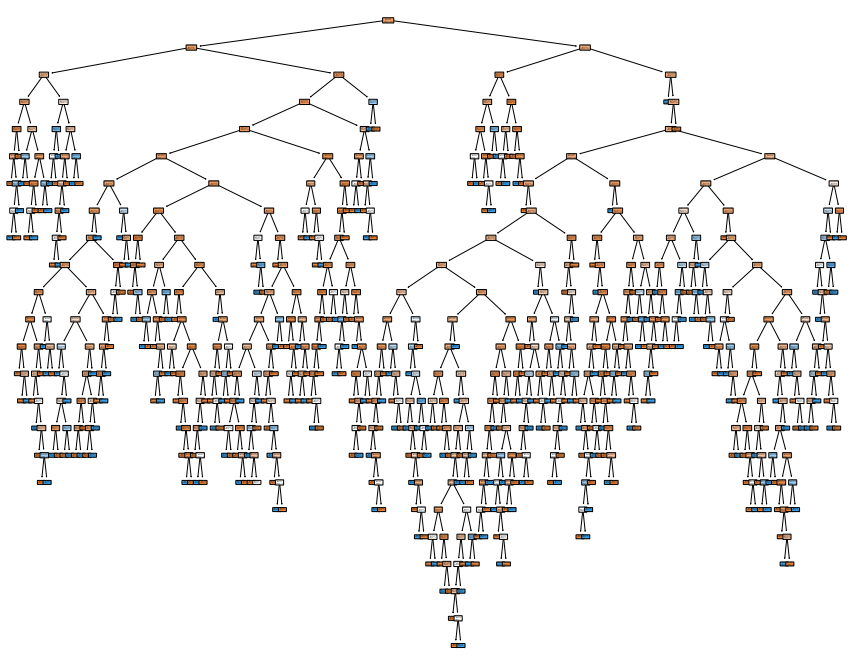

In [21]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)